# Steps to follow while design

- Import required things
- Load data and check
- Check the shape and info for null value
- fix the null values if available


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['species'] = iris.target

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.shape


(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [8]:
#to make this supervised data into unsupervised drop the label table 
df.drop(['species'], axis = 1 , inplace=True)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
#we will take the dimensions as it is 4 dimensions we take 2 dimensions to see how much it covers ...It is dimension reduction technique
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

print(pca.explained_variance_ratio_)
#These 2 are giving almost 98% data. so we dont need other two dimensions. 

[0.92461872 0.05306648]


In [12]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [16]:
pca_result.shape

(150, 2)

In [17]:
 #Implemention K-means, using elbow value as we dont know the value of K

distance_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_result)
    distance_list.append(kmeans.inertia_)


C:\Users\asadi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\asadi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\asadi\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\asadi\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\asadi\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

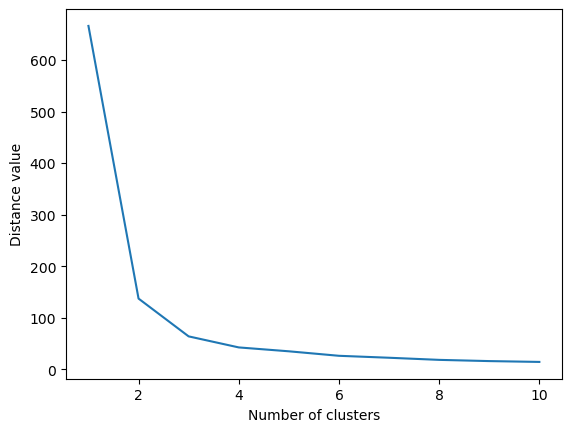

In [18]:
plt.plot(range(1,11), distance_list)
plt.xlabel("Number of clusters")
plt.ylabel("Distance value")
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3 , n)
kmeans.fit(pca_result)


C:\Users\asadi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

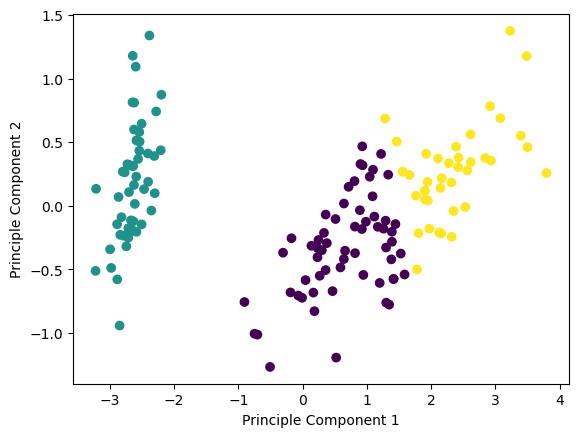

In [20]:
plt.scatter(pca_result[:,0], pca_result[:, 1], c=kmeans.labels_)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

In [25]:
# DBSCAN Algorithm
#eps is the radius here

dbscan = DBSCAN (eps=1, min_samples = 2)
dbscan.fit(pca_result) 


DBSCAN(eps=1, min_samples=2)

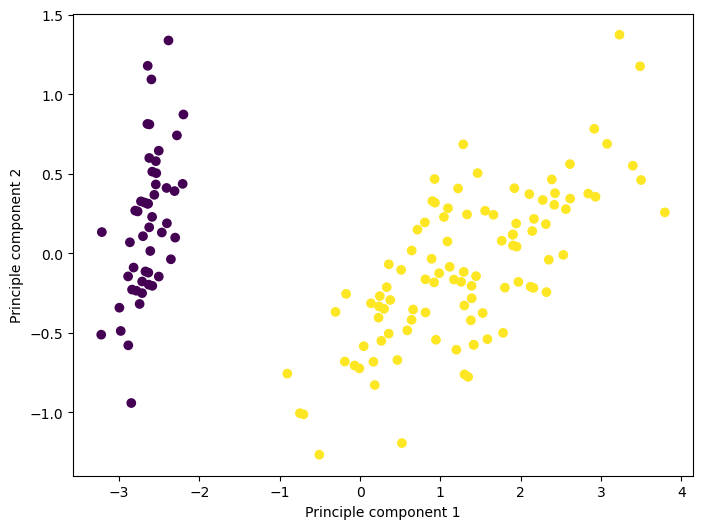

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:, 1], c=dbscan.labels_)
plt.xlabel("Principle component 1")
plt.ylabel("Principle component 2")
plt.show()

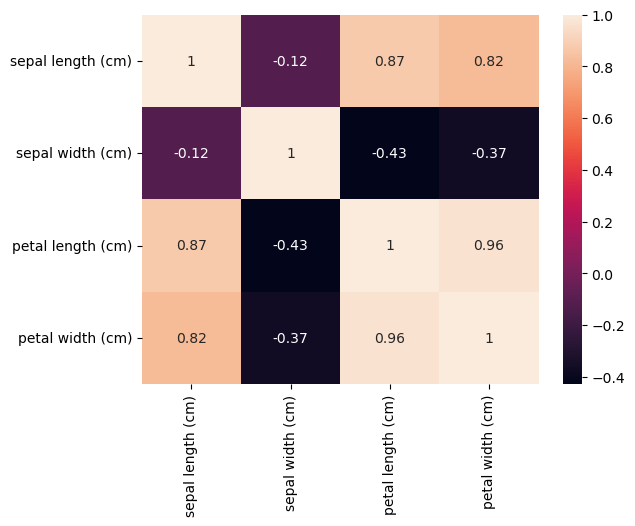

In [27]:
#Corellation Matrix
iris_corr = df.corr()
sns.heatmap(iris_corr, annot=True)
plt.show()